# AmSat to kindle STEM in India

## Overview

We need a LEO Polar Sun Sync orbit AmSat with FM repeater and few sensors data monitor.
Which inturn can be tracked and listened to by students at heart by using either a suitable FM receiver
or better still a SDR reciever.


## a NOTE

These are some initial thoughts in general, need to think/check

Below are few simple minded calculations to get a very very rough initial idea of few things. It is more simple geometry based and far removed from actual orbital characteristics. But still ...

Also I have nevered looked into satelite orbits and its implications before, on top these are my initial thoughts, that too with simple minded modeling, so take these with a big pinch of salt ;-)

In [84]:
import math
import numpy
import matplotlib.pyplot as plt

## Earth

In [85]:
# Gravitational Constant (m^3 / (kg * s^2))
iGravitationalConstant = (6.674 / 10**11)

# Earth Radius (m)
iEarthRadius = 6_400_000

# Earth Mass (kg)
iEarthMass = 5.972 * 10**24

# Earth Circumference
iEarthCircumference = 2 * math.pi * iEarthRadius
print("EarthCircumference:", iEarthCircumference)


EarthCircumference: 40212385.96594935


## Orbit

The Polar orbit should allow the satellite to cover most parts of the earth.

If a orbit altitude is reached such that the velocity achieved can ensure that N (1 or more) full orbits can be finished in time T, such that T is 24 hours or its multiples, then the satellite will retrace the same path at the same relative time once every T hours i.e T/24 days. NOTE: Not sure if the LEO orbits is sufficiently stable enough over a long period of atleast few weeks, so that it can be used to have a simple tracking wrt the satellite for that period.

If a sun synchronous orbit is achived or maintained, then depending on the angle wrt earth-sun orbital plane,

* if it is 90 degrees, then the satellite could be placed always in day light, so that solar power is always available. However one needs to verify if the temperature of the satellite parts can be maintained well within reasonable operating range, in this case. Is the attitude maintaining rotation good enough or not or conductive heat distribution pipes/paths good enough or ...

* if it is 0 degrees, then the satellite would be always at around roughly mid day or mid night wrt the places on earth, depending on which side of the earth wrt sun, that place is.

The satellite may pass over a given ground location between 0 to 2 times under normal conditions for a polar sun synchronous orbit. Ideally this would be twice if the satellite (and its RF system) covers all parts of the earth fully in a day.


## LEO

In [86]:
## LowEarthOrbit

iLeoAltitudeAboveGround = 500_000
iLeoAltitudeFromEarthCenter = iEarthRadius + iLeoAltitudeAboveGround
print("LEO orbit altitude wrt Earth Center:", iLeoAltitudeFromEarthCenter)

# LEO Velocity
#F = (GMm)/(r^2) = ma = m(v^2/r) => GM = r(v^2)
iLeoVelocity = math.sqrt((iGravitationalConstant * iEarthMass)/iLeoAltitudeFromEarthCenter)
print("LEO Velocity:", iLeoVelocity)

# Circumference of the orbit
iLeoCircumference = 2 * math.pi * iLeoAltitudeFromEarthCenter
print("LeoCircumference:", iLeoCircumference)

# Time taken for a single orbit
iLeoOrbitTimeTaken = iLeoCircumference/iLeoVelocity
print("LeoOrbitTimeTaken(mins):", iLeoOrbitTimeTaken/60)

# Num of Siteings in a day
iDayInSecs = 24*60*60
iNumOfSiteingsInADay = iDayInSecs/iLeoOrbitTimeTaken
print("NumOfSiteings in a Day:", iNumOfSiteingsInADay)
iDayInSecs/(iDayInSecs%iLeoOrbitTimeTaken)
#0.146*103


LEO orbit altitude wrt Earth Center: 6900000
LEO Velocity: 7600.260102337841
LeoCircumference: 43353978.61953914
LeoOrbitTimeTaken(mins): 95.0712607984812
NumOfSiteings in a Day: 15.146533115326104


103.36593937566968

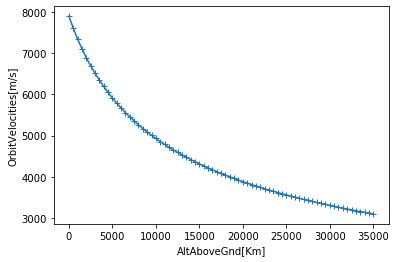

In [87]:
## Orbital Velocities

iAltitudesAboveGround = numpy.linspace(0,10_000_000, 20)
iAltitudesAboveGround = numpy.arange(0,35_500_000, 500_000)
def orbitvelocity_from_altitude(altitudeFromCenter, theMainMass=iEarthMass):
    return numpy.sqrt((iGravitationalConstant*theMainMass)/altitudeFromCenter)

def orbittime_from_altitude(altitudeFromCenter, theMainMass=iEarthMass):
    orbVel = orbitvelocity_from_altitude(altitudeFromCenter, theMainMass)
    orbCirumference = 2 * math.pi * altitudeFromCenter
    return orbCirumference/orbVel

iOrbitVelocities = orbitvelocity_from_altitude(iAltitudesAboveGround+iEarthRadius)
iOrbitTimes = orbittime_from_altitude(iAltitudesAboveGround+iEarthRadius)
plt.plot(iAltitudesAboveGround/1000, iOrbitVelocities, "+-")
#plt.plot(iAltitudesAboveGround/1000, iOrbitTimes, "+-r")
plt.xlabel("AltAboveGnd[Km]")
plt.ylabel("OrbitVelocities[m/s]")
plt.show()


## Earth coverage

In [88]:
# Earth Coverage and Altitude

# Sin(Angle) = OppositeSide/Hypotinus
# Cos(Angle) = AdjacentSide/Hypotinus
# Tan(Angle) = Opposite/Adjacent
# Opposite = Tan(Angle) * Adjacent
# AdjacentSide = Altitude from surface
# Angle = FieldOfView
iSatAltitude = numpy.array([200_000, 500_000, 1_000_000, 36_000_000])
iFieldOfView = 106 # Adjusted to sync NumOfSiteings/day with EarthEquatorialCircumferenceCoverage from 500KM
iFieldOfView = 60
iEarthCoverageRadius = numpy.tan(((iFieldOfView/2)/360)*math.pi*2)*iSatAltitude
print("EarthCoverageRadius[@{}]:{}".format(iFieldOfView, iEarthCoverageRadius))
math.atan(iEarthRadius/(iEarthRadius+36_000_000)) * (360/(math.pi*2))
math.atan(iEarthRadius/(iEarthRadius+500_000)) * (360/(math.pi*2))

# Minimum number of orbits to cover the earths equatorial circumference
iEarthCircumferenceAtEquatorCoveredPerOrbit = iEarthCoverageRadius*2*2
print("EarthCircumferenceAtEquator CoveredPerOrbit:", iEarthCircumferenceAtEquatorCoveredPerOrbit)
iMinNumOfOrbits4Equator=iEarthCircumference/iEarthCircumferenceAtEquatorCoveredPerOrbit
print("Minimum number of orbits required to cover earths equatorial circumference fully:", iMinNumOfOrbits4Equator)

# Movement of earth in a given time
iEarthMovementPerSecAtEquatorDueToRotation = iEarthCircumference/iDayInSecs
print("EarthMovementPerSecAtEquatorDueToRotation:", iEarthMovementPerSecAtEquatorDueToRotation)
iEarthMovementPerOrbitAtEquatorDueToRotation = iLeoOrbitTimeTaken * iEarthMovementPerSecAtEquatorDueToRotation
print("EarthMovementPerOrbitAtEquatorDueToRotation:", iEarthMovementPerOrbitAtEquatorDueToRotation)

# Percent of required area covered per orbit
(iEarthCircumferenceAtEquatorCoveredPerOrbit/iEarthMovementPerOrbitAtEquatorDueToRotation)*100

EarthCoverageRadius[@60]:[  115470.05383793   288675.13459481   577350.26918963 20784609.69082653]
EarthCircumferenceAtEquator CoveredPerOrbit: [  461880.2153517   1154700.53837925  2309401.0767585  83138438.76330611]
Minimum number of orbits required to cover earths equatorial circumference fully: [87.06236948 34.82494779 17.4124739   0.48367983]
EarthMovementPerSecAtEquatorDueToRotation: 465.4211338651545
EarthMovementPerOrbitAtEquatorDueToRotation: 2654890.439929136


array([  17.39733619,   43.49334048,   86.98668096, 3131.52051448])

EarthCircumferencePerDegree: 111701.07212763708
EarthMovementPerOrbitAtEquatorInDegrees[500000]:23.7678
179 179 1 1
{0, 260, 5, 133, 266, 11, 138, 272, 145, 16, 150, 278, 22, 283, 28, 156, 161, 290, 34, 295, 168, 40, 173, 301, 45, 179, 52, 307, 313, 57, 185, 190, 319, 63, 324, 197, 68, 202, 75, 330, 336, 80, 208, 342, 86, 214, 347, 220, 92, 353, 98, 226, 249, 231, 104, 359, 109, 237, 243, 115, 121, 254, 127}
[0, 168, 336, 145, 313, 121, 290, 98, 266, 75, 243, 52, 220, 28, 197, 5, 173, 342, 150, 319, 127, 295, 104, 272, 80, 249, 57, 226, 34, 202, 11, 179, 347, 156, 324, 133, 301, 109, 278, 86, 254, 63, 231, 40, 208, 16, 185, 353, 161, 330, 138, 307, 115, 283, 92, 260, 68, 237, 45, 214, 22, 190, 359]
Orbit: alt [400000] time [5580] FOVCvrgRadiusDegs [2.06748] cvrage% [72.3619] with [30] uniqOrbits
{0, 3, 7, 11, 14, 18, 22, 27, 30, 34, 38, 41, 45, 50, 54, 58, 61, 65, 69, 74, 77, 81, 85, 88, 92, 97, 101, 105, 108, 112, 116, 121, 124, 128, 132, 135, 139, 144, 148, 152, 155, 159, 163, 168, 1

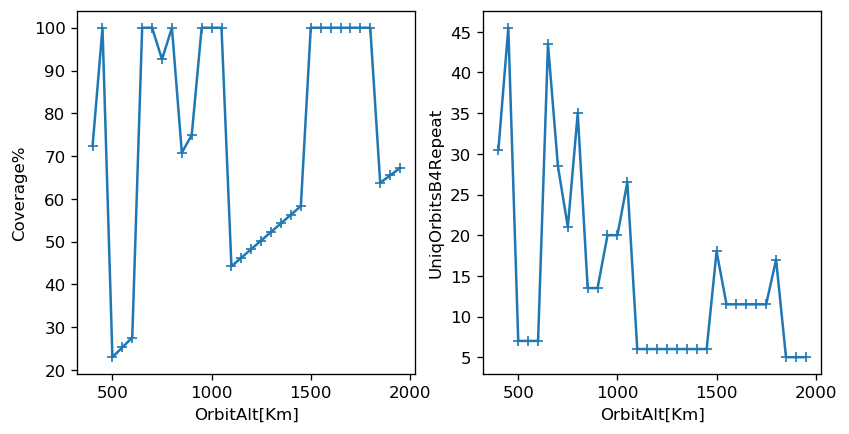

'0b1000000'

In [134]:
# Earth Equatorial Circumference covered across orbits


bCoverageGraphics = False


# Offsetting the base to a multiple of 360 instead of 0
# could simplify the calc by needing only mod, but going for simple straight interpretation 
def sane_pos(inPos):
    inPos = (inPos % 360)
    if inPos < 0:
        inPos = 360 + inPos
    return inPos


def test_sane_pos():
    for i in range(-520,520):
        print(i, sane_pos(i))


def dprint(msg, bDebug=False):
    if bDebug:
        print(msg)


iEarthCircumferencePerDegree = iEarthCircumference/360
print("EarthCircumferencePerDegree:", iEarthCircumferencePerDegree)
iEarthMovementPerOrbitAtEquatorInDegrees = iEarthMovementPerOrbitAtEquatorDueToRotation/iEarthCircumferencePerDegree
print("EarthMovementPerOrbitAtEquatorInDegrees[%d]:%g"%(iLeoAltitudeAboveGround, iEarthMovementPerOrbitAtEquatorInDegrees))


'''
def in_coverageradius(inPos, coverageRadiusInDegs):
    startPos = sane_pos(inPos-coverageRadiusInDegs)
    endPos = sane_pos(inPos+coverageRadiusInDegs)
    ...
'''
def circular_diff(pos1, pos2):
    '''
    pos1 and pos2 need to be +ve and within circular range
    '''
    delta = pos1 - pos2
    if delta > 180:
        delta = delta - 360
    if delta < -180:
        delta = 360 + delta
    return delta


def circular_absdiff(pos1, pos2):
    '''
    pos1 and pos2 need to be +ve and within circular range
    '''
    delta = pos1 - pos2
    if abs(delta) > 180:
        delta = 360-abs(delta)
    return abs(delta)


t1=circular_absdiff(270,89)
t2=circular_absdiff(89,270)
t3=circular_absdiff(359,0)
t4=circular_absdiff(0,359)
print(t1,t2,t3,t4)


def earthcoverage_given_orbittime(orbitTime, coverageRadiusInDegs=0):
    iEarthMovementPerOrbitAtEquator = orbitTime * iEarthMovementPerSecAtEquatorDueToRotation
    iEarthMovementPerOrbitAtEquatorInDegrees = iEarthMovementPerOrbitAtEquator / iEarthCircumferencePerDegree
    iMaxNumOrbits = 4096
    iStartPos = 0
    iCurPos = iStartPos
    iVisited = set()
    iVisitedL = []
    for i in range(iMaxNumOrbits*2):
        #print(iCurPos)
        iVisited.add(int(iCurPos))
        iVisitedL.append(int(iCurPos))
        # Move to opposite during orbit
        iCurPos = iCurPos + 180 - (iEarthMovementPerOrbitAtEquatorInDegrees/2)
        iCurPos = sane_pos(iCurPos)
        if circular_absdiff(iStartPos, iCurPos) <= coverageRadiusInDegs:
            iVisited.add(int(iCurPos))
            iVisitedL.append(int(iCurPos))
            dprint("Reached back to starting pos on %d th orbit"%(i/2))
            break
    coverageMultiplier = 2*coverageRadiusInDegs
    if coverageMultiplier == 0:
        coverageMultiplier = 1
    iPercentageCovered = (len(iVisited)/360)*coverageMultiplier*100
    dprint(iVisited, True)
    dprint(iVisitedL, True)
    dprint("%d[/%d] unique orbits, covered %d %% of earth with FOVCvrageRadiusDegs of %g"%(i/2, iMaxNumOrbits, iPercentageCovered, coverageRadiusInDegs), False)
    return iPercentageCovered, i/2, iVisitedL


lAlts = numpy.array([])
lCvrd = numpy.array([])
lUniqOrbits = numpy.array([])
iFieldOfView=60
for alt in range(400_000, 2_000_000, 50_000):
    lAlts = numpy.append(lAlts, alt) # easy to infer
    orbTime = orbittime_from_altitude(alt+iEarthRadius)
    iFOVCoverageRadius = numpy.tan(((iFieldOfView/2)/360)*math.pi*2)*alt
    iFOVCoverageRadiusInDegs = iFOVCoverageRadius / iEarthCircumferencePerDegree
    cvrageP, uniqOrbits, lVisited = earthcoverage_given_orbittime(orbTime, iFOVCoverageRadiusInDegs)
    lCvrd = numpy.append(lCvrd, cvrageP)
    lUniqOrbits = numpy.append(lUniqOrbits, uniqOrbits)
    print("Orbit: alt [%d] time [%d] FOVCvrgRadiusDegs [%g] cvrage%% [%g] with [%d] uniqOrbits"%(alt, orbTime, iFOVCoverageRadiusInDegs, cvrageP, uniqOrbits))
    #print("DBUG:", lVisited)
    if bCoverageGraphics:
        y = numpy.zeros(len(lVisited))
        plt.plot(lVisited, y, "+")
        plt.show()


plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 120
#plt.figure(figsize=(8,4), dpi=100)
plt.subplots(1,2)
plt.subplot(121)
tCvrd = numpy.clip(lCvrd, 0, 100)
plt.plot(lAlts/1000, tCvrd, "+-")
plt.ylabel("Coverage%")
plt.xlabel("OrbitAlt[Km]")

plt.subplot(122)
plt.plot(lAlts/1000, lUniqOrbits, "+-")
plt.ylabel("UniqOrbitsB4Repeat")
plt.xlabel("OrbitAlt[Km]")
plt.show()


bin(2**512-1)
bin(1 << 6)

## Return to Same point in Given time

### Find Orbit Radius given a Orbit Time

iOrbitTime = iOrbitCircumference/iOrbitVelocity

iOrbitCircumference = iOrbitTime * iOrbitVelocity

2 * Pi * iOrbitRadius = iOrbitTime * sqrt((iGravitationalConstant * iEarthMass)/iOrbitRadius)

4 * Pi^2 * iOrbitRadius^2 = iOrbitTime^2 * (iGravitationalConstant * iEarthMass) / iOrbitRadius

iOrbitRadius^3 = (iOrbitTime^2 * iGravitationalConst * iEarthMass) / (4 * Pi^2)

In [ ]:
def orbitradius_giventime(orbitTime, theMainMass=iEarthMass, gravitationalConstant=iGravitationalConstant):
    return numpy.cbrt((((orbitTime)**2)*gravitationalConstant*theMainMass)/(4*(numpy.pi**2)))

orbitradius_giventime(iLeoOrbitTimeTaken)-iEarthRadius
orbitradius_giventime(2*60*60)-iEarthRadius
#orbitradius_giventime(1.41545*60*60)-iEarthRadius
#1.41545*60

## Eclipse due to earth

In [ ]:
## Show Earth and Satellite Orbit
rads=numpy.linspace(0,numpy.pi*2,128)
xE = numpy.sin(rads)*iEarthRadius
yE = numpy.cos(rads)*iEarthRadius
plt.plot(xE,yE,"b", label="Earth")
xS = numpy.sin(rads)*iLeoAltitudeFromEarthCenter
yS = numpy.cos(rads)*iLeoAltitudeFromEarthCenter
plt.plot(xS,yS,"r.", label="SatOrbit")
plt.plot([0,xS[24]],[0,yS[24]],"g")
plt.plot([0,xS[-1-24]],[0,yS[-1-24]],"g")
plt.plot([xS[24],xS[-1-24]], [yS[24],yS[-1-24]])
#plt.plot([xS[-1-24],xS[-1-39]], [yS[-1-24],yS[-1-39]])
plt.plot([-iEarthRadius, -iEarthRadius],[-iEarthRadius,iEarthRadius])
plt.legend()
plt.show()

'''

## EvenMoreCrudeMath: rough amount of time for which satellite will be eclipsed by earth in a orbit
iHalfOfEarthToLeoCircumference = (0.5*iEarthCircumference)/iLeoCircumference
iMaxEclipseTime = iHalfOfEarthToLeoCircumference * iLeoOrbitTimeTaken
print("Satellite could be Eclipsed by Earth for a max of {} mins per Orbit".format(iMaxEclipseTime/60))
# Actual Eclipse time will be smaller than this, as light bends over (among others...)

'''

## Blind, based on simple direct EarthDia
iMinEclipseTime = (((iEarthRadius*2)/iLeoCircumference)*iLeoOrbitTimeTaken)
#print("EarthDia:", iEarthRadius*2)
#print("LeoCircumference:", iLeoCircumference)
print("Satellite could be Eclipsed by Earth for a minimum of around {} mins per Orbit".format(iMinEclipseTime/60))

## Bit better based on circle segment
halfAngle = math.asin(iEarthRadius/iLeoAltitudeFromEarthCenter)
#iEclipsedCircumference = (2*halfAngle) * iLeoAltitudeFromEarthCenter
iEclipsedCircumference = ((2*halfAngle)/(2*numpy.pi)) * iLeoCircumference
iEclipseTime = ((iEclipsedCircumference/iLeoCircumference)*iLeoOrbitTimeTaken)
print("Satellite could be Eclipsed by Earth for around {} mins per Orbit".format(iEclipseTime/60))


## Util functions

In [ ]:
# dB wrt milliwatt normally
def to_dBm(inWatts):
    return 10 * math.log10(inWatts/0.001)

# dB wrt isotropic antenna
def to_dBi(inPower):
    return 10 * math.log10(inPower/1)

iLightSpeed = 300_000_000 # meters / sec

def wavelen2freq(waveLen):
    return iLightSpeed/waveLen

def freq2wavelen(freq):
    return iLightSpeed/freq


## RF Comm

### RF Frequencies

AmSats normally use the following bands

* In V band = 145.8 - 146 MHz
* In U band = 435 - 438 MHz

The V band will be more crowded compared to U band.

At same time V band has

* less doppler effect (and so the related freq drift)
* lesser rf path losses

compared to the higher frequency U band.


### RF Losses

In [ ]:
# Using Friis transmission formula
# Pr = Pt * Dt * Dr * (Lambda/4*Pi*D)^2
# Pr_dBm = Pt_dBm + Dt_dBi + Dr_dBi + 10*log10((Lambda/4*Pi*D)^2)
# Pr_dBm = Pt_dBm + Dt_dBi + Dr_dBi + 20*log10(Lambda/4*Pi*D)
# Pr_dBm = Pt_dBm + Dt_dBi + Dr_dBi + 20*log10(Lambda) - 20*log10(D) - 20*log10(1/4*Pi)
#
powerTransmitter = 0.5 # Watts; this is what is normal for LEO AmSats
powerTransmitterDBm = to_dBm(powerTransmitter)
print("TransmitPower(dBm):", powerTransmitterDBm)
directivityTransmitter = 1
directivityTransmitterDBi = to_dBi(directivityTransmitter)
directivityReciever = 1 # Change based on antenne system used
directivityRecieverDBi = to_dBi(directivityReciever)
frequencies = numpy.array([145_800_000, 435_000_000, 900_000_000, 2_400_000_000 ])
print("Frequencies:", frequencies)
distances = numpy.array([[500_000],[1_000_000]])


# This doesnt consider any losses through_the/due_to medium of propagation, nor multipath, nor ...
# However as the path loss is the major factor given the distances involved, its used to get a rough feel
def freespace_pathloss(Pt_dBm, Dt_dBi, Dr_dBi, frequencies, distances):
    Pr_dBm = Pt_dBm + Dt_dBi + Dr_dBi + 20*numpy.log10(iLightSpeed/(4*numpy.pi*distances*frequencies))
    return Pr_dBm


powerRecieverDBm = freespace_pathloss(powerTransmitterDBm, directivityTransmitterDBi, directivityRecieverDBi,
                                       frequencies, distances)
print("PowerAtReciever_Rough(dBm):\n",powerRecieverDBm)
plt.plot(frequencies, numpy.atleast_2d(powerRecieverDBm).T,"+-")
plt.legend(["500Km", "1000Km"])
plt.xlabel("Freqs")
plt.ylabel("RecieverDBm")
plt.show()

### Doppler effect

In [ ]:
commFreqs = numpy.array([145_800_000, 436_000_000])
dopShifts = commFreqs*(iLeoVelocity/iLightSpeed)
print("DopplerShifts[in Hz] for {} is {}".format(commFreqs, dopShifts))
dopShifts = frequencies*(iLeoVelocity/iLightSpeed)
plt.plot(frequencies, dopShifts, "+-")
plt.xlabel("Freqs")
plt.ylabel("Drift(Hz)")
plt.show()

### Data comm

In turn use a simple mechanism to transmit the sensor data like

a) Simple Analog frequency modulation: Different frequencies for different values

b) Analog frequency modulated tones for different decimal digits from 0 to 9, maybe each 200 Hz appart.

c) Binary Digital Keying: Presence or absence of Frequency or Toggle btw 2 different sets of frequencies indicate between 0 and 1.

## Misc

#### FootNotes

Will reside somewhere at https://github.com/hanishkvc